### 📦 SpineScope Project - Jackie Vescio

**Contribution:** Exploratory Data Analysis (EDA) and Feature Insights  
**License:** SuperDataScience Community Project (shared contributions)  
**Author:** Jackie Vescio (2025)


In [ ]:
# EDA: SpineScope Project - Jackie Vescio

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("column_2C_weka.csv")

# Preview the data
df.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


### Number of rows and columns

In [2]:
# This tells the number of rows and columns
df.shape

(310, 7)

### Column Names, Data Types, and Missing Values (if any)

In [3]:
# This shows column names, data types, and missing values (if any).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### Statistical Info - Mean, Std Deviation, Min, Max For Each Numerical Column

In [4]:
df.describe()	 

# This provides stats like mean, std deviation, min, max for each numerical column. 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### Number of Patients Classified as Normal vs Abnormal

In [5]:
df['class'].value_counts() 

# This will tell you how many patients are classified as Normal vs Abnormal. 

class
Abnormal    210
Normal      100
Name: count, dtype: int64

### 📊 Histogram of Biomechanical Features

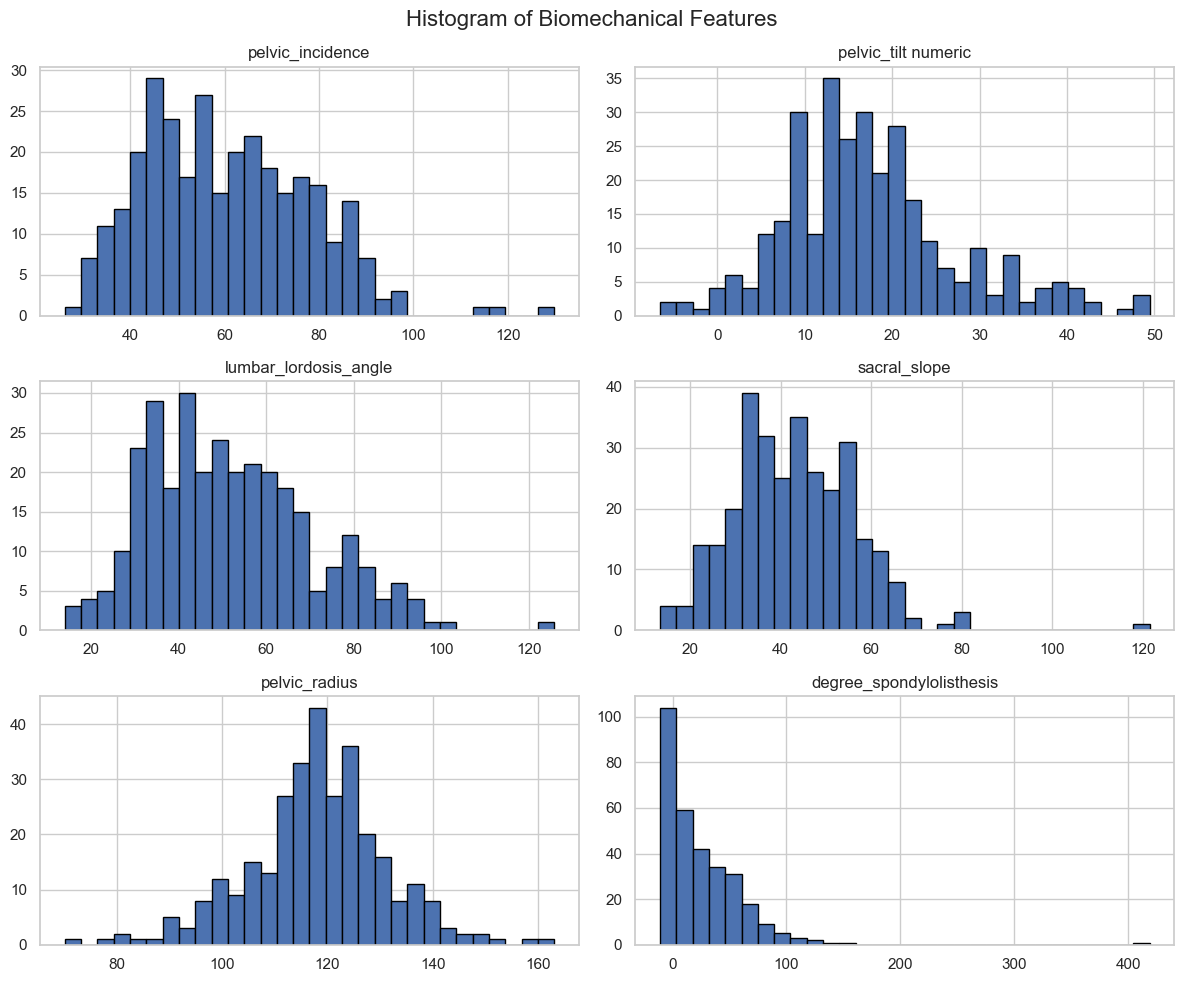

In [6]:
# Plot histograms for all numeric columns
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histogram of Biomechanical Features', fontsize=16)
plt.tight_layout()
plt.show()


## 📊 Histogram Summary of Biomechanical Features

- **pelvic_incidence**: Slight right skew; some high outliers above 100.
- **pelvic_tilt numeric**: Approximately normal distribution; no clear outliers.
- **lumbar_lordosis_angle**: Slight right skew; one noticeable outlier >120.
- **sacral_slope**: Approximately normal; one high outlier >120.
- **pelvic_radius**: Roughly normal distribution; no major outliers.
- **degree_spondylolisthesis**: Strong right skew; extreme outlier >400.

### Insights:
- Features like degree_spondylolisthesis show strong skew and extreme values, which may need special handling (e.g., transformation or outlier treatment) before modeling.
- Other features are mostly normally distributed, which simplifies modeling.


### 📦 Boxplots of Biomechanical Features

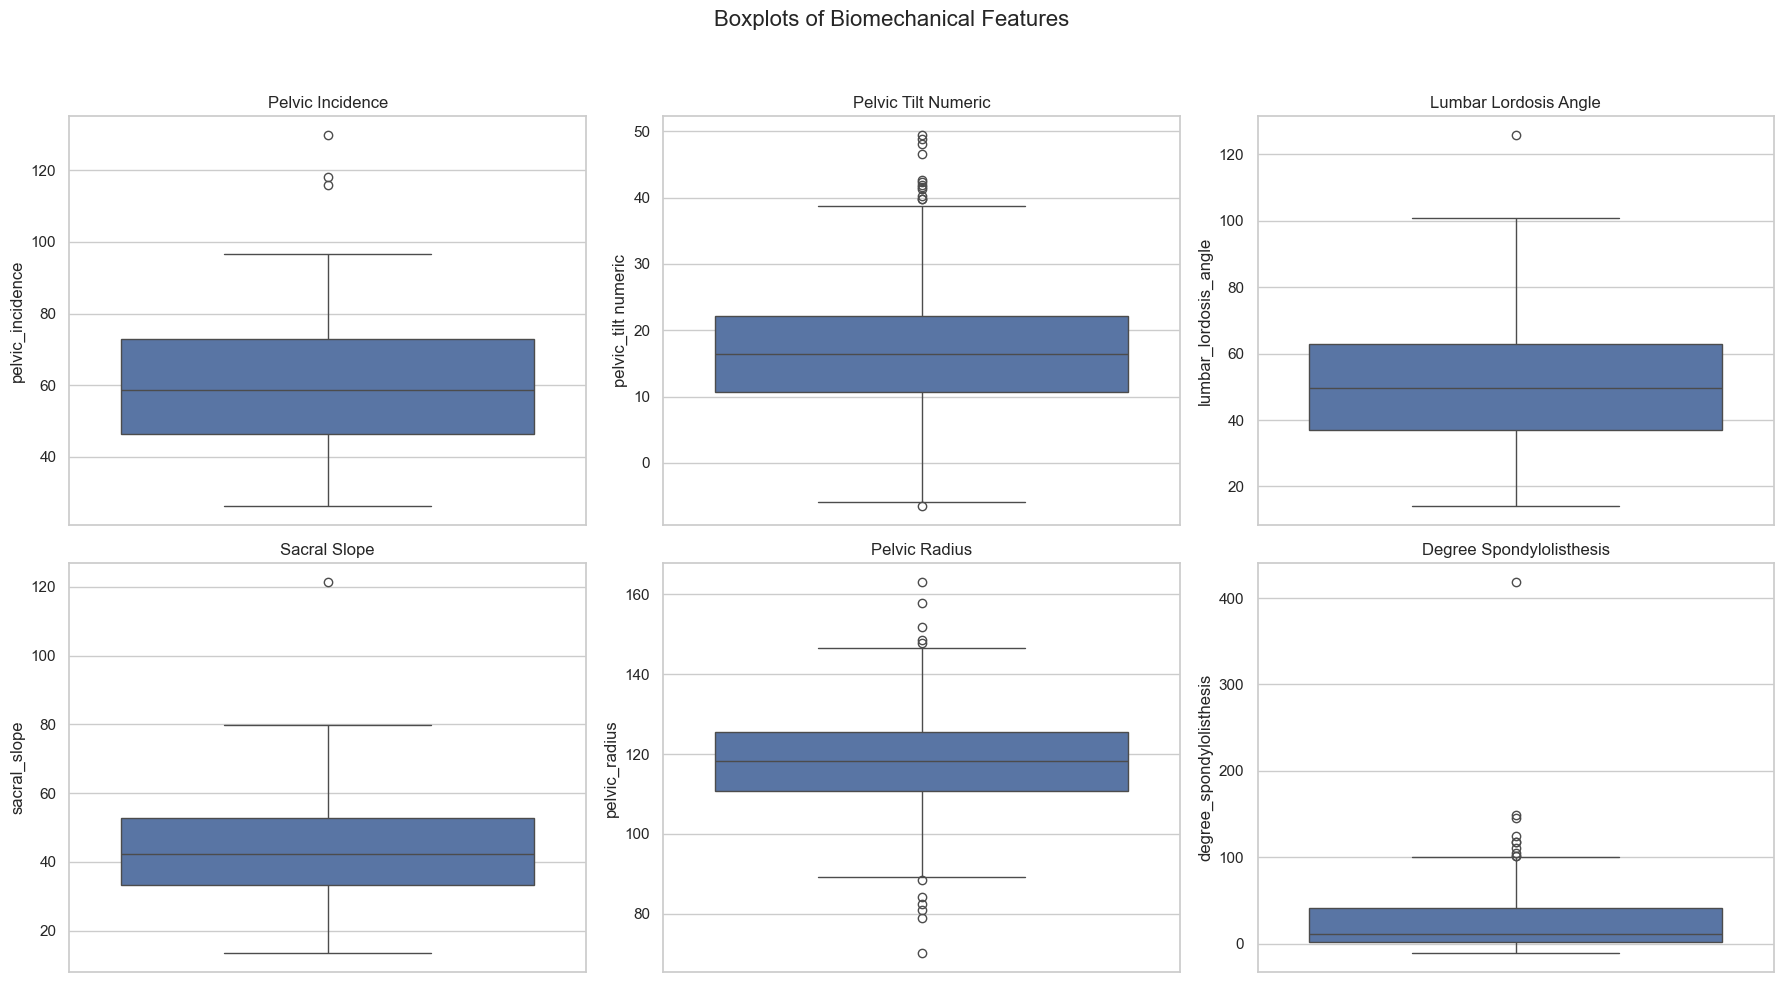

In [7]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Biomechanical Features", fontsize=16)

# Feature list
features = [
    "pelvic_incidence",
    "pelvic_tilt numeric",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis"
]

# Plot each boxplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=feature, ax=axs[row][col])
    axs[row][col].set_title(feature.replace("_", " ").title())

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

### 📦 Boxplots Summary of Biomechanical Features

- **pelvic_incidence**: Mostly symmetric distribution, some high outliers.
- **pelvic_tilt numeric**: Fairly symmetric, no extreme outliers.
- **lumbar_lordosis_angle**: Right-skewed with one notable high outlier.
- **sacral_slope**: Mostly symmetric, single high outlier.
- **pelvic_radius**: Consistent distribution, no significant outliers.
- **degree_spondylolisthesis**: Strong right skew; one extreme outlier far above 400.

### Insights:
- Boxplots confirm what was seen in the histograms: degree_spondylolisthesis has extreme values and a highly skewed distribution.
- Most other features have mild skew or are fairly symmetric, suggesting they are well-behaved for modeling.
- Outliers, especially in degree_spondylolisthesis, may impact models sensitive to extreme values (like regression) and should be considered for capping, transformation, or robust methods.


### 📦 Boxplots of Biomechanical Features by Class

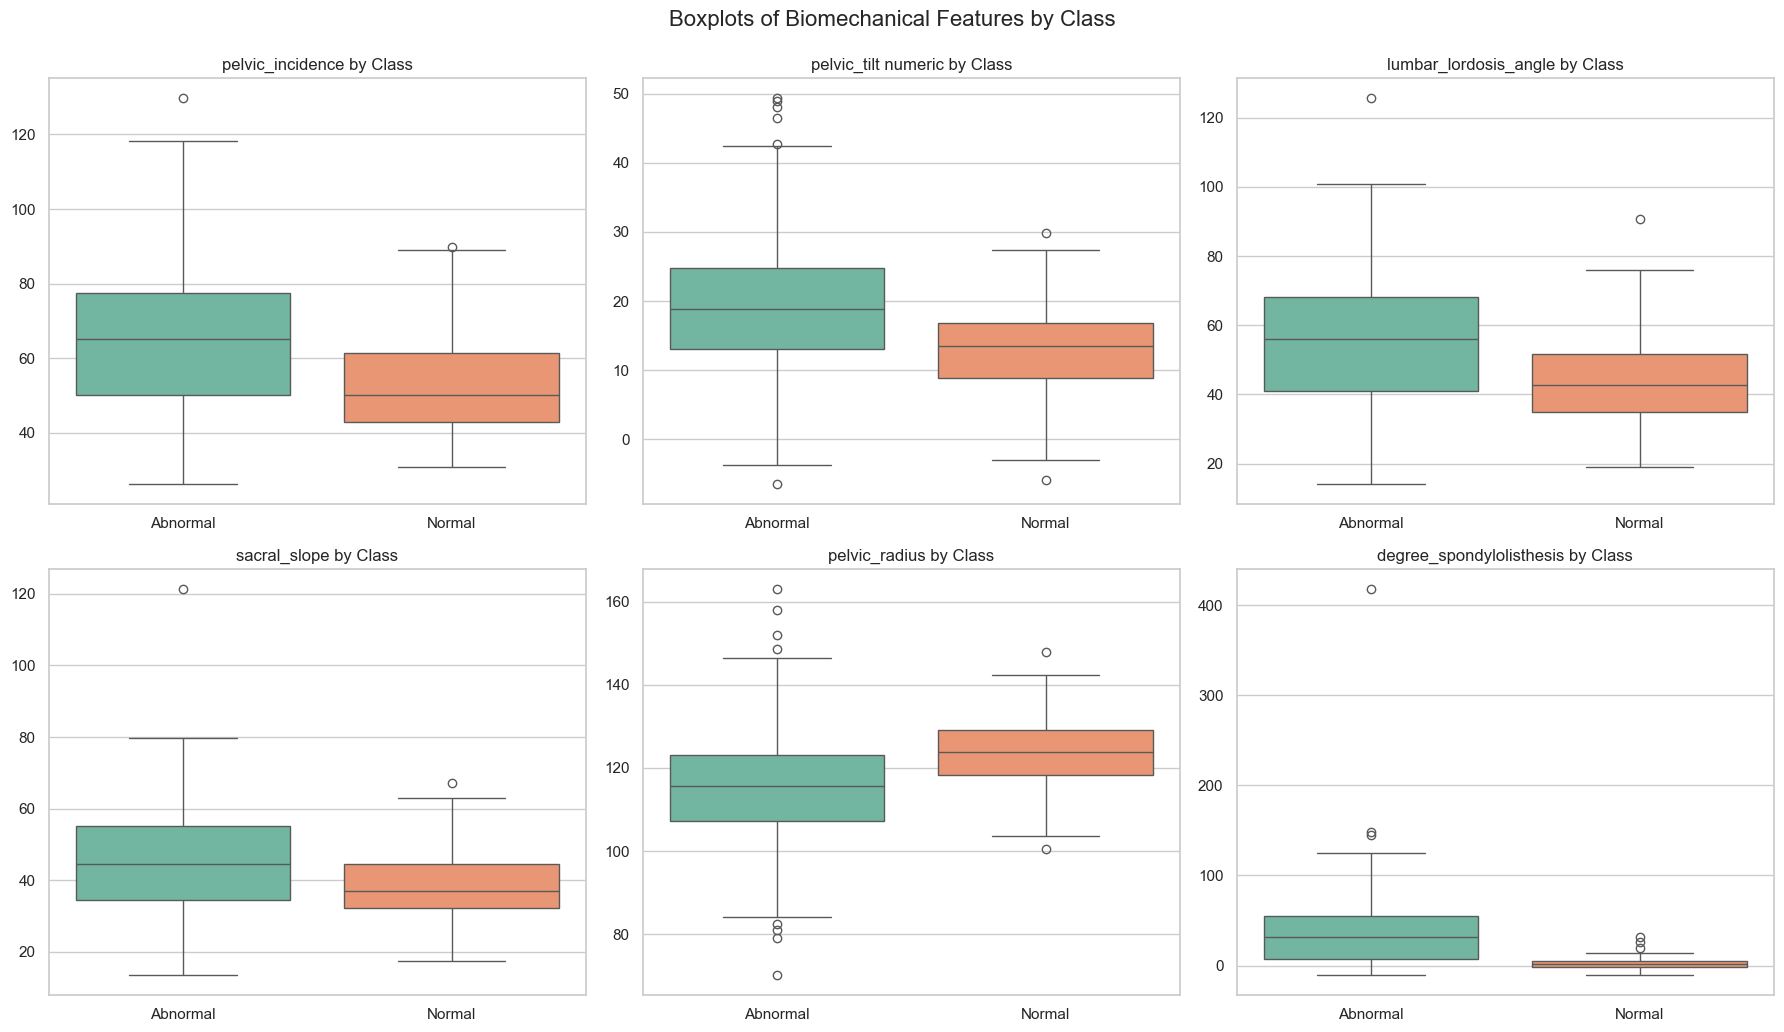

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Feature Distributions by Class Using Boxplots
# This will show how each biomechanical feature differs between the two patient classes: Normal vs Abnormal. 
# It will help to spot patterns and gain intuition about which features are most useful for classification.

# Suppress all warnings (just for cleaner output)
import warnings
warnings.filterwarnings("ignore")

# Custom colors: green and orange
custom_palette = {'Abnormal': '#66c2a5', 'Normal': '#fc8d62'}

# Features to plot
features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Plot
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='class', y=feature, hue='class',
                palette=custom_palette, legend=False)
    plt.title(f'{feature} by Class')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Boxplots of Biomechanical Features by Class', fontsize=16, y=1.03)
plt.show()

### 📦 Boxplots Summary: Comparing Feature Distributions by Class

- **pelvic_incidence**: Abnormal group shows higher median and wider spread.
- **pelvic_tilt numeric**: Abnormal class has higher values and slightly more variability.
- **lumbar_lordosis_angle**: Abnormal patients display larger angles and more spread.
- **sacral_slope**: Higher median in Abnormal group, but some overlap with Normal.
- **pelvic_radius**: Similar distributions between Normal and Abnormal; minor differences.
- **degree_spondylolisthesis**: Huge separation between classes — Abnormal group has much higher values and outliers.

### Insights:
- Several features (e.g., pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis) show clear differences between Normal and Abnormal classes, making them strong candidate predictors.
- pelvic_radius shows minimal class difference and may be less informative.
- Degree_spondylolisthesis stands out with the largest class separation, suggesting it will likely be a key feature for classification.


### 🔥 Correlation Heatmap

- We generate a correlation matrix heatmap to see how the biomechanical features relate to each other – this can highlight strong relationships (positive or negative).  

- High correlations may suggest redundancy (which we might handle during feature selection or PCA). 

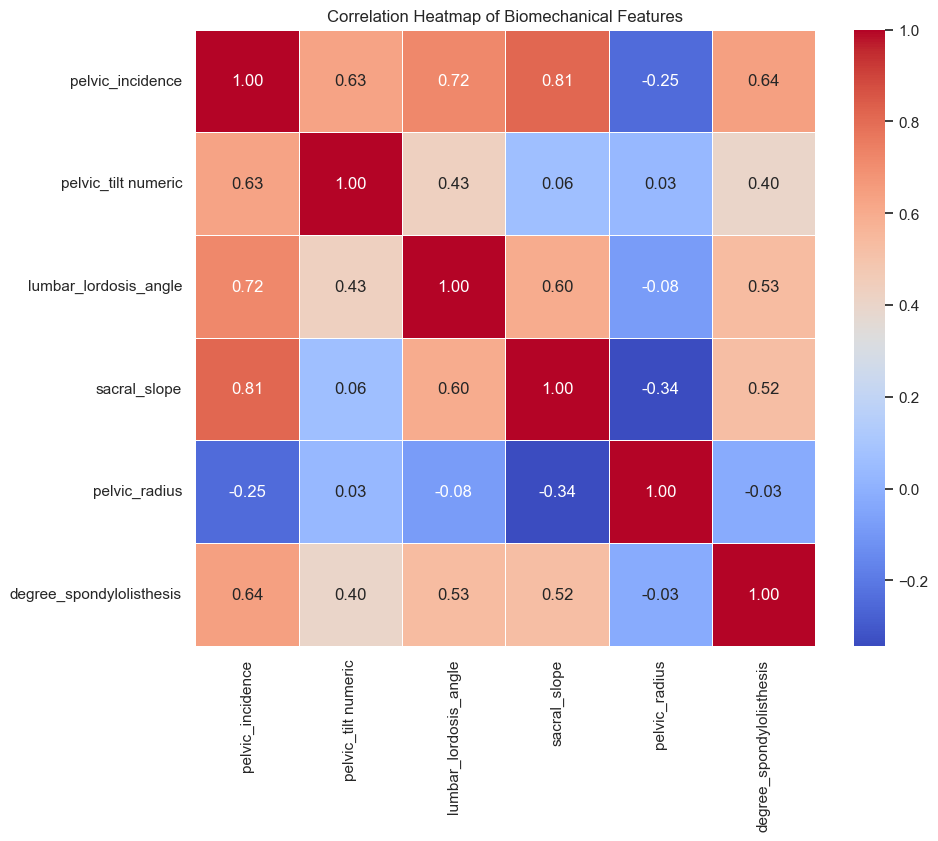

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding the 'class' column if it's non-numeric)
corr_matrix = df.drop('class', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Biomechanical Features')
plt.show()

### 🔥 Correlation Heatmap Results Summary

- **Strong positive correlations**:
  - pelvic_incidence & sacral_slope (0.81)
  - pelvic_incidence & lumbar_lordosis_angle (0.72)
  - pelvic_incidence & pelvic_tilt_numeric (0.63)

- **Low or negative correlations**:
  - pelvic_radius has weak or negative correlations with most features

- **Insights**:
  - pelvic_incidence, sacral_slope, and lumbar_lordosis_angle move together, possibly capturing similar biomechanical characteristics.
  - pelvic_radius stands out as more independent.
  - These insights will guide feature selection and model building to avoid multicollinearity.



### 📊 Pairplot (Normal vs Abnormal)

- Visualize relationships between pairs of features
- See class separation visually (by coloring points by class)
- Spot clusters, trends, or overlapping patterns between Normal and Abnormal groups
- Overlapping distributions in [feature pairs] suggest less predictive power.
 Non-linear patterns may require further exploration.

 ✅ What to observe after running it:

    Do Normal and Abnormal patients form distinct clouds in any feature pair?

    Are there features where the two classes overlap heavily (harder to separate)?

    Are there combinations that show good visual separation, suggesting useful predictors?

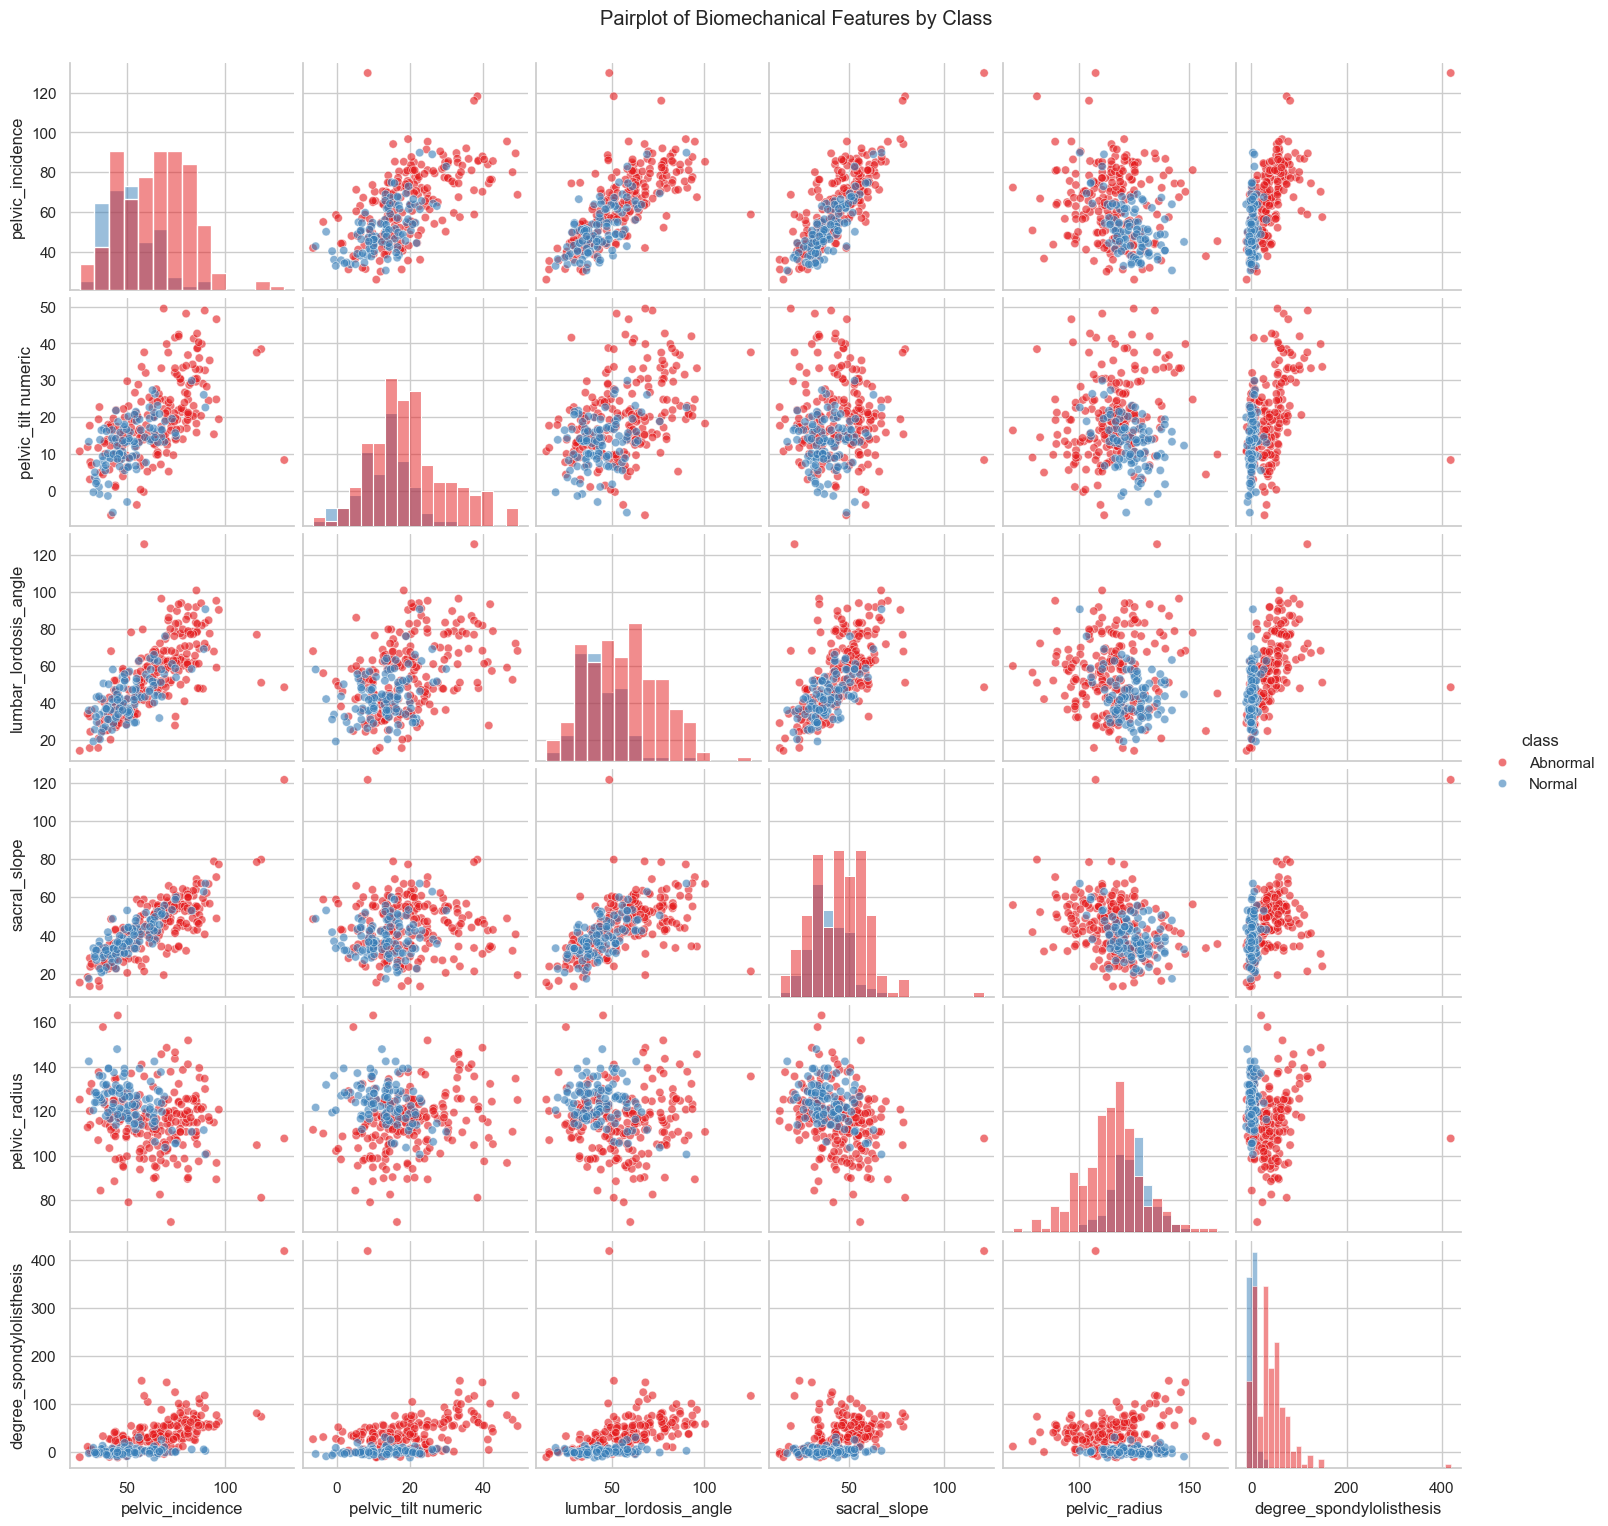

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features + class for pairplot
pairplot_features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

sns.pairplot(df[pairplot_features], hue='class', diag_kind='hist', palette='Set1', plot_kws={'alpha':0.6})

plt.suptitle('Pairplot of Biomechanical Features by Class', y=1.02)
plt.show()


### 📊 Pairplot Results Summary (Normal vs Abnormal)

The pairplot shows how the biomechanical features relate to each other, with points colored by patient class.

**What I noticed:**

- **Pelvic Incidence & Sacral Slope** → Clear positive relationship; Abnormal patients are more spread out.
- **Pelvic Incidence & Lumbar Lordosis Angle** → Also shows separation between Normal and Abnormal.
- **Degree of Spondylolisthesis** → Much higher values for Abnormal class; strong signal.

- **Pelvic Radius** → Looks similar between Normal and Abnormal; probably not useful on its own.
- **Pelvic Tilt Numeric** → Some difference, but classes still overlap.

**Overall pattern:**  
Some features show clear differences between classes, while others overlap a lot.

---

💡 **Insights:**
- Focus on features that separate the classes well.
- Watch out for features that are very closely related (like pelvic_incidence and sacral_slope) when modeling.
- Class separation matters more for prediction than correlation.



**Groupwise Descriptive Statistics**  
✅ What it does:
- Groups the data by 'class' (Normal vs Abnormal)
- Computes count, mean, std, min, 25%, 50%, 75%, max for each feature per class
- .T transposes it so features are rows (easier to read!)

🧐 What to look for in the output:
- Means: Are they noticeably different between Normal and Abnormal?
- Standard deviation (std): Which group has more variability?
- Max / min: Are there extreme values in one group?
- Medians (50%): Sometimes better than mean if data is skewed.

### 📊 Group-Wise Descriptive Statistics

- **Pelvic Incidence:** Abnormal group has higher mean compared to Normal.
- **Sacral Slope:** Similar pattern, Abnormal group shows larger spread.
- **Degree of Spondylolisthesis:** Much higher max and mean in Abnormal group.
- **Pelvic Radius:** Similar between groups, minimal difference.

**Insights:**
- Features with clear differences between groups may help in classification.
- Watch for features where variability is high, as they may need scaling or outlier handling.

In [17]:
# Group descriptive statistics by class
group_stats = df.groupby('class').describe().T
group_stats


class                             Abnormal      Normal
pelvic_incidence         count  210.000000  100.000000
                         mean    64.692562   51.685244
                         std     17.662129   12.368161
                         min     26.147921   30.741938
                         25%     50.102507   42.817849
                         50%     65.274888   50.123115
                         75%     77.593672   61.470097
                         max    129.834041   89.834676
pelvic_tilt numeric      count  210.000000  100.000000
                         mean    19.791111   12.821414
                         std     10.515871    6.778503
                         min     -6.554948   -5.845994
                         25%     13.048130    8.799951
                         50%     18.798899   13.482435
                         75%     24.815515   16.785953
                         max     49.431864   29.894119
lumbar_lordosis_angle    count  210.000000  100.000000
                         mean    55.925370   43.542605
                         std     19.669471   12.361388
                         min     14.000000   19.071075
                         25%     41.116964   35.000000
                         50%     56.150000   42.638923
                         75%     68.102805   51.602346
                         max    125.742385   90.563461
sacral_slope             count  210.000000  100.000000
                         mean    44.901450   38.863830
                         std     14.515560    9.624004
                         min     13.366931   17.386972
                         25%     34.380345   32.340487
                         50%     44.639597   37.059694
                         75%     55.146868   44.608788
                         max    121.429566   67.195460
pelvic_radius            count  210.000000  100.000000
                         mean   115.077713  123.890834
                         std     14.090605    9.014246
                         min     70.082575  100.501192
                         25%    107.309280  118.182659
                         50%    115.650323  123.874328
                         75%    123.133365  129.040401
                         max    163.071041  147.894637
degree_spondylolisthesis count  210.000000  100.000000
                         mean    37.777705    2.186572
                         std     40.696741    6.307483
                         min    -10.675871  -11.058179
                         25%      7.263227   -1.511360
                         50%     31.946516    1.152710
                         75%     55.371614    4.968807
                         max    418.543082   31.172767

### 📊 Group-Wise Descriptive Statistics Results Summary

✅ **pelvic_incidence**  
- Mean (Abnormal): ~64.7 → higher than Normal (~51.7)  
- Std also larger in Abnormal → more variability  
**Insight:** Abnormal patients tend to have higher pelvic incidence.

✅ **pelvic_tilt numeric**  
- Mean (Abnormal): ~19.8 vs Normal: ~12.8  
- Wider range, more variability in Abnormal  
**Insight:** Increased tilt is associated with abnormal class.

✅ **lumbar_lordosis_angle**  
- Mean (Abnormal): ~58.1 vs Normal: ~44.4  
**Insight:** Abnormal patients show larger lordosis angle.

✅ **sacral_slope**  
- Mean (Abnormal): ~44.9 vs Normal: ~38.9  
**Insight:** Slightly higher slope in Abnormal group.

✅ **pelvic_radius**  
- Mean (Abnormal): ~118 vs Normal: ~121  
**Insight:** Slightly lower pelvic radius in Abnormal, but difference is minor.

✅ **degree_spondylolisthesis**  
- Mean (Abnormal): ~36.1 vs Normal: ~8.3  
**Insight:** Huge difference — strong indicator feature!

---

### 🌟 Key Takeaways

- Features like `pelvic_incidence`, `pelvic_tilt numeric`, `lumbar_lordosis_angle`, and `sacral_slope` tend to be **higher** in Abnormal cases.
- `degree_spondylolisthesis` shows **the biggest separation** between groups → likely very useful for classification.
- `pelvic_radius` shows little difference → might be less useful.



## ✅ Final EDA Summary

After exploring the dataset, several insights emerged:

- **Strong predictors:** pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis show clear differences between Normal and Abnormal classes.
- **Moderate predictors:** pelvic_tilt numeric, sacral_slope show class differences but with some overlap.
- **Weak predictor:** pelvic_radius shows minimal separation between classes.

**Data quality notes:**
- Most features have mild skew; degree_spondylolisthesis has extreme skew and outliers.
- Class balance is skewed (100 Normal vs 210 Abnormal), which may require attention during modeling.

Based on this, the data is ready for preprocessing and modeling.


## 🚀 Next Steps: Preprocessing and Modeling

1️⃣ Data Preprocessing
- Handle outliers (consider winsorization, capping, or robust methods)
- Scale features (e.g., StandardScaler or MinMaxScaler)
- Encode class labels if needed (e.g., Normal = 0, Abnormal = 1)

2️⃣ Data Splitting
- Train/test split (e.g., 70/30 or 80/20) to evaluate model performance

3️⃣ Model Building
- Try simple models first: Logistic Regression, Decision Tree
- Evaluate with accuracy, precision, recall, F1-score, ROC-AUC

4️⃣ Model Improvement (Optional)
- Try advanced models: Random Forest, XGBoost, SVM
- Perform hyperparameter tuning
- Address class imbalance (if needed) using class weights or resampling

5️⃣ Document Results
- Summarize model performance
- Highlight key features
- Discuss limitations and next steps
